# CNN Trained on Synthetic Data

## Loading Required Libraries

In [14]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPooling2D, Dense, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, CSVLogger, ReduceLROnPlateau

In [15]:
def load_images(path):
    images = []
    for file in os.listdir(path):
        img = cv2.imread(os.path.join(path, file))
        if img is not None:
            images.append(img)
    return images

In [16]:
def create_model(x, y, inChannel):
    model=Sequential()
    model.add(Conv2D(16, (3,3),input_shape=(x, y, inChannel)))
    model.add(LeakyReLU(alpha=0.05))
    model.add(Conv2D(32, (3,3), input_shape=(x, y, inChannel)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.05))
    model.add(MaxPooling2D((3,3),padding='same',strides=(1,1)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
    model.add(Dense(2,activation='softmax'))
    return model

In [17]:
def callbacks(class_type):
    csv_logger = CSVLogger("Results/model_history_"+class_type+"_synth.csv", append=True)
    reduce_lr_rate=0.5
    earlyStopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=32, verbose=0, mode='auto')
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=reduce_lr_rate, patience=2,
                                  cooldown=0, min_lr=0.00001, verbose=0)
    callbacks_list = [earlyStopping, reduce_lr, csv_logger]
    return callbacks_list

## Abnormal Class

### Data Loading

In [5]:
class_type = 'abnormal'
no_path = class_type + '_new/'+class_type+'_class_0/'
yes_path = class_type + '_new/'+class_type+'_class_1/'

no_data = load_images(no_path)
no_data = np.stack(no_data, axis = -1)
no_data = np.moveaxis(no_data, -1, 0)
no_labs = np.zeros((no_data.shape[0], 1))

yes_data = load_images(yes_path)
yes_data = np.stack(yes_data, axis = -1)
yes_data = np.moveaxis(yes_data, -1, 0)
yes_labs = np.ones((yes_data.shape[0], 1))

train_data = np.vstack((no_data, yes_data))
labels = np.vstack((no_labs, yes_labs))

one_hot_labs = np.zeros((len(labels), 2))

ctr = 0
for label in labels:
    if label == 0:
        one_hot_labs[ctr, 0] = 1
    elif label == 1:
        one_hot_labs[ctr, 1] = 1
    ctr+=1

### Train and Validate

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 510, 510, 16)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 508, 508, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 508, 508, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 508, 508, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 508, 508, 32)     0         
 2D)                                                  

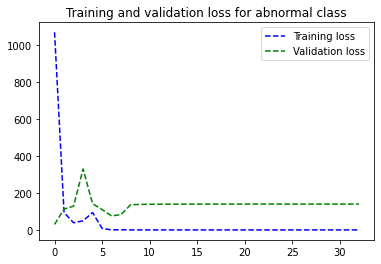

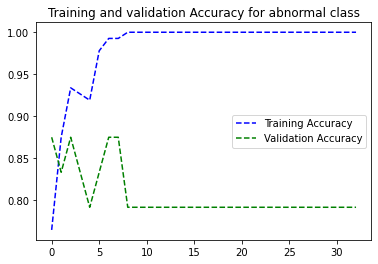

In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,one_hot_labs,test_size=0.2,random_state=13)

batch_size_ = 4
epochs_ = 100
inChannel = train_X.shape[3]
x, y =  train_X.shape[1], train_X.shape[2]

model = create_model(x, y, inChannel)
model.summary()

callbacks_list = callbacks(class_type)
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC() ])
model_train = model.fit(train_X, train_ground,
                    epochs = epochs_, batch_size = batch_size_,
                    verbose=1, validation_split=0.15, callbacks=callbacks_list)

test_eval=model.evaluate(valid_X,valid_ground, verbose=0)
print("Test Accuracy: ",test_eval[1])

loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(300)
plt.figure()
plt.plot(loss, 'b--', label='Training loss')
plt.plot(val_loss, 'g--', label='Validation loss')
plt.title('Training and validation loss for ' + class_type + ' class')
plt.legend()
plt.show()

acc = model_train.history['accuracy']
val_acc = model_train.history['val_accuracy']
epochs = range(300)
plt.figure()
plt.plot(acc, 'b--', label='Training Accuracy')
plt.plot(val_acc, 'g--', label='Validation Accuracy')
plt.title('Training and validation Accuracy for ' + class_type + ' class')
plt.legend()
plt.show()

## 2. ACL Class

### Data Loading

In [10]:
class_type = 'acl'
no_path = class_type + '_new/'+class_type+'_class_0/'
yes_path = class_type + '_new/'+class_type+'_class_1/'

no_data = load_images(no_path)
no_data = np.stack(no_data, axis = -1)
no_data = np.moveaxis(no_data, -1, 0)
no_labs = np.zeros((no_data.shape[0], 1))

yes_data = load_images(yes_path)
yes_data = np.stack(yes_data, axis = -1)
yes_data = np.moveaxis(yes_data, -1, 0)
yes_labs = np.ones((yes_data.shape[0], 1))

train_data = np.vstack((no_data, yes_data))
labels = np.vstack((no_labs, yes_labs))

one_hot_labs = np.zeros((len(labels), 2))

ctr = 0
for label in labels:
    if label == 0:
        one_hot_labs[ctr, 0] = 1
    elif label == 1:
        one_hot_labs[ctr, 1] = 1
    ctr+=1

### Train and Validate

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 510, 510, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 508, 508, 32)      4640      
                                                                 
 batch_normalization_3 (Batc  (None, 508, 508, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 508, 508, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 508, 508, 32)     0         
 2D)                                                  

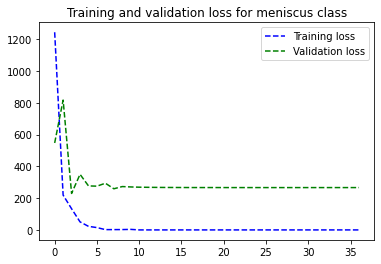

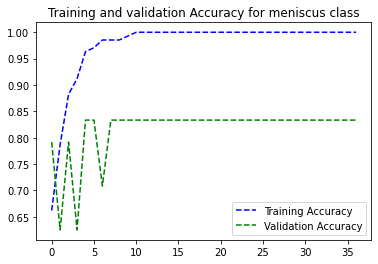

In [18]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,one_hot_labs,test_size=0.2,random_state=13)

batch_size_ = 4
epochs_ = 100
inChannel = train_X.shape[3]
x, y =  train_X.shape[1], train_X.shape[2]

model = create_model(x, y, inChannel)
model.summary()

callbacks_list = callbacks(class_type)
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
model_train = model.fit(train_X, train_ground,
                    epochs = epochs_, batch_size = batch_size_,
                    verbose=1, validation_split=0.15, callbacks=callbacks_list)

test_eval=model.evaluate(valid_X,valid_ground, verbose=0)
print("Test Accuracy: ",test_eval[1])

loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(300)
plt.figure()
plt.plot(loss, 'b--', label='Training loss')
plt.plot(val_loss, 'g--', label='Validation loss')
plt.title('Training and validation loss for ' + class_type + ' class')
plt.legend()
plt.show()

acc = model_train.history['accuracy']
val_acc = model_train.history['val_accuracy']
epochs = range(300)
plt.figure()
plt.plot(acc, 'b--', label='Training Accuracy')
plt.plot(val_acc, 'g--', label='Validation Accuracy')
plt.title('Training and validation Accuracy for ' + class_type + ' class')
plt.legend()
plt.show()

## 3. Meniscus Class

### Data Loading

In [20]:
class_type = 'meniscus'
no_path = class_type + '_new/'+class_type+'_class_0/'
yes_path = class_type + '_new/'+class_type+'_class_1/'

no_data = load_images(no_path)
no_data = np.stack(no_data, axis = -1)
no_data = np.moveaxis(no_data, -1, 0)
no_labs = np.zeros((no_data.shape[0], 1))

yes_data = load_images(yes_path)
yes_data = np.stack(yes_data, axis = -1)
yes_data = np.moveaxis(yes_data, -1, 0)
yes_labs = np.ones((yes_data.shape[0], 1))

train_data = np.vstack((no_data, yes_data))
labels = np.vstack((no_labs, yes_labs))

one_hot_labs = np.zeros((len(labels), 2))

ctr = 0
for label in labels:
    if label == 0:
        one_hot_labs[ctr, 0] = 1
    elif label == 1:
        one_hot_labs[ctr, 1] = 1
    ctr+=1

### Train and Validate

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 510, 510, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 508, 508, 32)      4640      
                                                                 
 batch_normalization_4 (Batc  (None, 508, 508, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 508, 508, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 508, 508, 32)     0         
 2D)                                                  

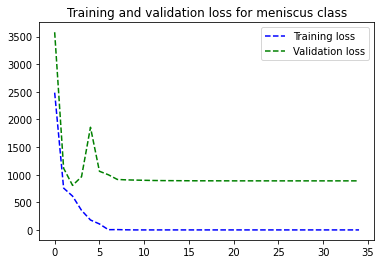

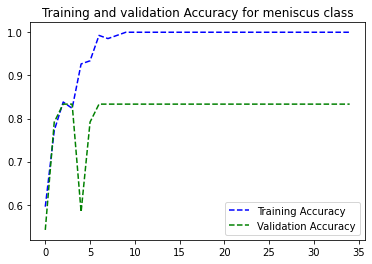

In [19]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,one_hot_labs,test_size=0.2,random_state=13)

batch_size_ = 4
epochs_ = 100
inChannel = train_X.shape[3]
x, y =  train_X.shape[1], train_X.shape[2]

model = create_model(x, y, inChannel)
model.summary()

callbacks_list = callbacks(class_type)
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
model_train = model.fit(train_X, train_ground,
                    epochs = epochs_, batch_size = batch_size_,
                    verbose=1, validation_split=0.15, callbacks=callbacks_list)

test_eval=model.evaluate(valid_X,valid_ground, verbose=0)
print("Test Accuracy: ",test_eval[1])

loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(300)
plt.figure()
plt.plot(loss, 'b--', label='Training loss')
plt.plot(val_loss, 'g--', label='Validation loss')
plt.title('Training and validation loss for ' + class_type + ' class')
plt.legend()
plt.show()

acc = model_train.history['accuracy']
val_acc = model_train.history['val_accuracy']
epochs = range(300)
plt.figure()
plt.plot(acc, 'b--', label='Training Accuracy')
plt.plot(val_acc, 'g--', label='Validation Accuracy')
plt.title('Training and validation Accuracy for ' + class_type + ' class')
plt.legend()
plt.show()

# THE END